In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [19]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent_date = dt.datetime.strptime(recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.

prior_date = most_recent_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

date_precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prior_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

date_precipitation_df = pd.DataFrame(date_precipitation, columns= ["Date", "Precipitation"])
date_precipitation_df


# Sort the dataframe by date

date_precipitation_df = date_precipitation_df.sort_values(by="Date").dropna().set_index("Date")
date_precipitation_df.head()




,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


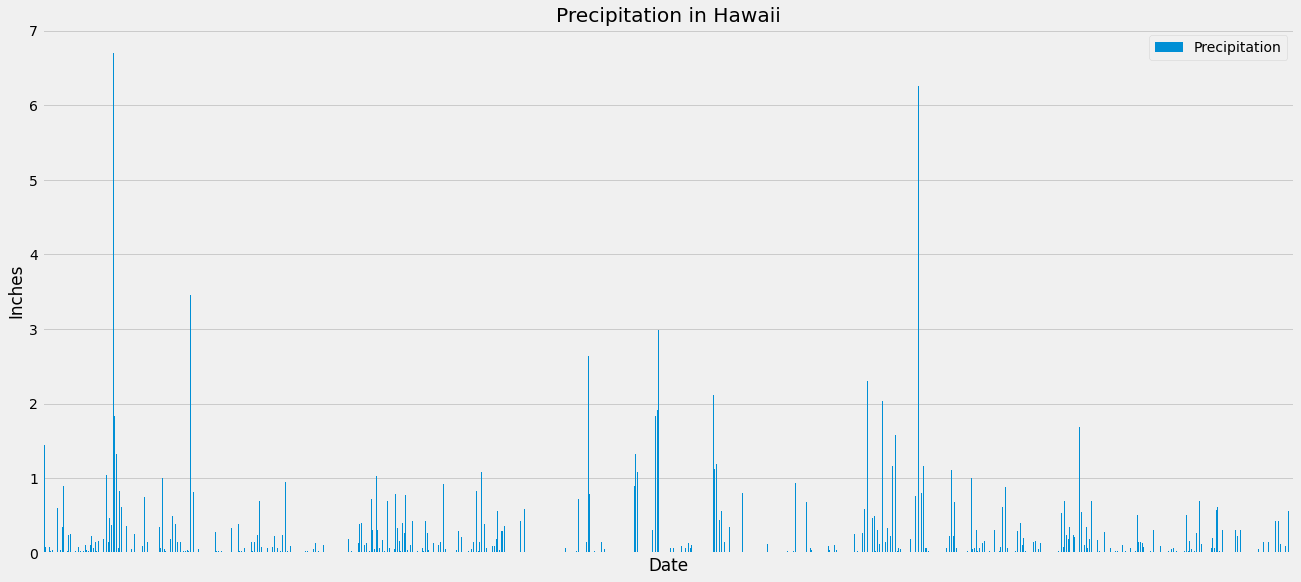

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data
X=np.arange(len(date_precipitation_df), 15, 8)
date_precipitation_df.plot.bar(figsize=(20,9))
plt.title("Precipitation in Hawaii")
plt.xticks(X)
plt.ylabel("Inches")
plt.show()


In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [53]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
most_active_station

(temp_min, temp_max, temp_avg) = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Station.station == Measurement.station).filter(Station.station == most_active_station).first()
print(f"The lowest temperature for station {most_active_station} is: {temp_min}")
print(f"The highest temperature for station {most_active_station} is: {temp_max}")
print(f"The average temperature for station {most_active_station} is: {temp_avg}")

The lowest temperature for station USC00519281 is: 54.0
The highest temperature for station USC00519281 is: 85.0
The average temperature for station USC00519281 is: 71.66378066378067


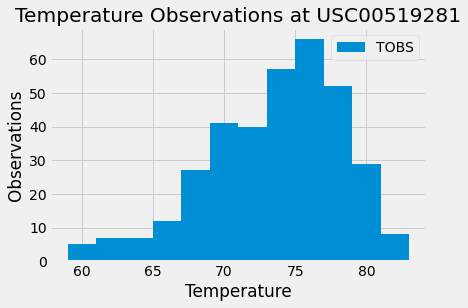

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram              
last_12_months= session.query(Measurement.date, Measurement.tobs).filter(Station.station == Measurement.station).filter(Station.station == most_active_station).filter(Measurement.date > prior_date)
last_12_months_df=pd.DataFrame(last_12_months, columns=["Date", "TOBS"]).set_index("Date")    

last_12_months_df
            
plt.hist(x=last_12_months_df['TOBS'], bins=12, label='TOBS')
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title(f"Temperature Observations at {most_active_station}")
plt.legend()
plt.show()

# Close session

In [78]:
# Close Session
session.close()